# 1 Libraries Import

In [89]:
# ========================================================
# = Libraries import
# ========================================================
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

# 2 Parameter Setting

In [90]:
# When working with MONITORS, we determine a time period:
time_start = '2022-07-30'
time_end = '2023-07-30'

# set measure name we concern
fimer_measure_name_list = ['Inv.DC.P.W', 'Inv.DC.U.V', 'Inv.DC.I.A', 'Gen.W', 'Inv.AC.U.V', 'Inv.AC.I.A', 'Inv.AC.Freq.Hz']

# for theoretical calculation
tilt = 10
azimuth = 10
loss_factor = 0.85

# 3 Read Data

In [ ]:
# ========================================================
# = Read Raw Data
# ========================================================
df_sites = pd.read_csv('../input_data/SITE_nodeType_20230630.csv')
df_monitors = pd.read_csv('../input_data/MNTR_ddb_20230630.csv')
# df_monitors.head()

In [92]:
df_dc = pd.read_csv('../preprocessed_data/stringfaults/DC_raw_stringinfo_20230808.csv', index_col=0)
df_dc.set_index('time', inplace=True)
df_dc.head()

,Gen.W:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,Inv.AC.P.Ph1.W:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,Inv.AC.P.Ph2.W:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,Inv.AC.P.Ph3.W:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,Inv.AC.U.Ph1.V:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,Inv.AC.U.Ph2.V:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,Inv.AC.U.Ph3.V:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,Inv.AC.I.Ph1.A:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,Inv.AC.I.Ph2.A:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,Inv.AC.I.Ph3.A:MNTR|092c3a54-c621-4a63-b8e0-80d14ffc261c,...,Inv.AC.I.Ph1.A:MNTR|7193486a-bebd-4ff8-8c60-ae7000197adf,Inv.AC.I.Ph2.A:MNTR|7193486a-bebd-4ff8-8c60-ae7000197adf,Inv.AC.I.Ph3.A:MNTR|7193486a-bebd-4ff8-8c60-ae7000197adf,Inv.DC.P.MPTT1.W:MNTR|7193486a-bebd-4ff8-8c60-ae7000197adf,Inv.DC.P.MPTT2.W:MNTR|7193486a-bebd-4ff8-8c60-ae7000197adf,Inv.DC.U.MPTT1.V:MNTR|7193486a-bebd-4ff8-8c60-ae7000197adf,Inv.DC.U.MPTT2.V:MNTR|7193486a-bebd-4ff8-8c60-ae7000197adf,Inv.DC.I.MPTT1.A:MNTR|7193486a-bebd-4ff8-8c60-ae7000197adf,Inv.DC.I.MPTT2.A:MNTR|7193486a-bebd-4ff8-8c60-ae7000197adf,Gen.W:MNTR|25546391
time,,,,,,,,,,,,,,,,,,,,,
2023-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
## fimer
df_fimer = pd.read_csv('../preprocessed_data/monitors_DCdata/FIMER_20231019.csv')
df_fimer = df_fimer[(df_fimer['time']>=time_start) & (df_fimer['time']<=time_end)]
df_fimer.index = np.arange(len(df_fimer))
fimer_list = df_fimer.iloc[:, 1:].columns.str.split(':').str[1]
fimer_list = list(set(fimer_list))
df_fimer.head()

,time,Inv.AC.U.V:MNTR|22179934,Inv.AC.I.A:MNTR|22179934,Gen.W:MNTR|22179934,Inv.AC.Freq.Hz:MNTR|22179934,Inv.DC.U.V:MNTR|22179934,Inv.DC.P.W:MNTR|22179934,Inv.AC.U.V:MNTR|8937329,Inv.AC.I.A:MNTR|8937329,Gen.W:MNTR|8937329,...,Gen.W:MNTR|22131936,Inv.AC.Freq.Hz:MNTR|22131936,Inv.DC.U.V:MNTR|22131936,Inv.DC.P.W:MNTR|22131936,Inv.AC.U.V:MNTR|22243104,Inv.AC.I.A:MNTR|22243104,Gen.W:MNTR|22243104,Inv.AC.Freq.Hz:MNTR|22243104,Inv.DC.U.V:MNTR|22243104,Inv.DC.P.W:MNTR|22243104
0,2022-07-30 00:00:00,252.0,0.0,0.0,50.0,293.0,0.0,249.0,0.0,0.0,...,0.0,50.0,526.0,268.0,246.0,0.0,0.0,50.0,296.0,0.0
1,2022-07-30 00:05:00,252.0,0.0,0.0,50.0,293.0,0.0,249.0,0.0,0.0,...,0.0,50.0,526.0,268.0,246.0,0.0,0.0,50.0,296.0,0.0
2,2022-07-30 00:10:00,252.0,0.0,0.0,50.0,293.0,0.0,249.0,0.0,0.0,...,0.0,50.0,526.0,268.0,246.0,0.0,0.0,50.0,296.0,0.0
3,2022-07-30 00:15:00,252.0,0.0,0.0,50.0,293.0,0.0,249.0,0.0,0.0,...,0.0,50.0,526.0,268.0,246.0,0.0,0.0,50.0,296.0,0.0
4,2022-07-30 00:20:00,252.0,0.0,0.0,50.0,293.0,0.0,249.0,0.0,0.0,...,0.0,50.0,526.0,268.0,246.0,0.0,0.0,50.0,296.0,0.0


In [94]:
## sma
df_sma0 = pd.read_csv('../preprocessed_data/monitors_DCdata/df_SMA_0.csv', index_col=0)
monitor_sma0_list = set(df_sma0.columns.str.split(':').str[-1])
df_sma1 = pd.read_csv('../preprocessed_data/monitors_DCdata/df_SMA_1.csv', index_col=0)
monitor_sma1_list = set(df_sma0.columns.str.split(':').str[-1])
df_sma2 = pd.read_csv('../preprocessed_data/monitors_DCdata/df_SMA_2.csv', index_col=0)
monitor_sma2_list = set(df_sma0.columns.str.split(':').str[-1])

In [95]:
# check if a monitor in the downloaded file
monitors_data_list = list(set(df_dc.columns.str.split('|').str[-1]))
if '5541098' in monitors_data_list:
    print('yes')

In [96]:
## this is the latest data available with information of total string number
df_fimer_labelled = pd.read_csv('../preprocessed_data/stringfaults/FIMER.csv')
df_sma_other_labelled = pd.read_csv('../preprocessed_data/stringfaults/sma_others.csv')


In [97]:
labelled_sma_monitor_list = df_sma_other_labelled.columns.str.split(':').str[1].str.split('|').str[1].unique().values[1:].tolist()
labelled_fimer_monitor_list = df_fimer_labelled.columns.str.split(':').str[1].str.split('|').str[1].unique().values[1:].tolist()
labelled_sma_monitor_list

['ec00fa5c-5d00-4d84-85a3-3ca61b87dcf4',
 '437d284d-6a30-4a8f-90fc-56d1ce8a02da',
 '2ZVN-HJT3-R0U9-ZAG8',
 'DX9L-JTRO-BWOE-659O']

## 3.1. Target MID

In [98]:
# ========================================================
# = Information of the target Monitor
# ========================================================
# potential sma
# MID = 'ec00fa5c-5d00-4d84-85a3-3ca61b87dcf4'
MID = '092c3a54-c621-4a63-b8e0-80d14ffc261c' # string fault

aldi_list = ['2f0df140-4102-4c1c-893f-15aee3810e1c', '5c6dbde5-c78e-451e-b1ec-6704864fffcc', '092c3a54-c621-4a63-b8e0-80d14ffc261c']

site_id = df_monitors.loc[df_monitors['source']== str('MNTR|' + MID), 'siteId'].iloc[0]
time_zone = df_sites.loc[df_sites['source']==site_id, 'timezone'].values[0]
latitude = df_monitors.loc[df_monitors['source']==str('MNTR|' + MID), 'latitude'].values[0][1:]
latitude = float(latitude)
longitude = df_monitors.loc[df_monitors['source']==str('MNTR|' + MID), 'longitude'].values[0]
longitude = float(longitude)
timezone_value = df_sites[df_sites['source'] == site_id]['timezone'].values[0]
pv_size = df_monitors.loc[df_monitors['source']== str('MNTR|' + MID), 'pvSizeWatt'].values[0]
monitor_type = df_monitors.loc[df_monitors['source']== str('MNTR|' + MID), 'manufacturerApi'].values[0]
concern_mppt = 'Inv.DC.P.MPTT1.W'
print(monitor_type)
site_id


FRONIUS


'SITE|c4e9450c-1d4c-44ad-af9e-38a0b4a1a58d'

## 3.2. Check the monitor and read the raw data

In [99]:
# ========================================================
# = Select elements in a array or list with a string
# ========================================================
def select_elements_with_string(iterable, search_string):
    """
    Select elements from the iterable that include the search_string.

    Args:
        iterable (iterable): The input iterable (list, NumPy array, etc.).
        search_string (str): The string to search for.

    Returns:
        list or numpy.ndarray: Elements from the iterable that include the search_string.
    """
    if isinstance(iterable, list):
        return [item for item in iterable if search_string in item]
    elif isinstance(iterable, np.ndarray):
        mask = np.array([search_string in item for item in iterable])
        return iterable[mask]
    else:
        raise ValueError("Input iterable type not supported")


In [100]:
# ========================================================
# = Read raw data & preprocess data
# ========================================================

def read_preprocess_monitor(df, MID, pvsize):
    '''
    df: index is time
    MID: MNTR|6905111
    '''
    ## == read data for the single monotor
    df_monitor = df.filter(regex='{}$'.format(MID))
    split_columns = df_monitor.columns.str.split(':').str[0]
    df_monitor.columns = split_columns
    df_monitor.reset_index(inplace=True)
    df_monitor['time'] = pd.to_datetime(df_monitor['time'].values)

    ## some columns related with the time
    metrics_name_list = df_monitor.columns.to_list()[1:]
    power_metrics_list = select_elements_with_string(iterable=metrics_name_list, search_string='.W')
    df_monitor['minute'] = df_monitor['time'].dt.minute
    df_monitor['hour'] = df_monitor['time'].dt.hour
    df_monitor['date'] = df_monitor['time'].dt.date
    df_monitor['date'] = df_monitor['date'].astype(pd.StringDtype())

    ## == processing data ====##
    # ========================================================
    # = Processing outliers based on the PV size
    # ========================================================
    if len(power_metrics_list) != 0:
        df_pre = df_monitor.copy()
        # outliers
        for power_metric in power_metrics_list:
            df_pre.loc[df_pre[power_metric]>1.2*pvsize, metrics_name_list] = np.NaN
        # ========================================================
        # = Filling up the missing data
        # ========================================================
        first_valid_idx = df_pre['Gen.W'].first_valid_index()
        last_valid_idx = df_pre['Gen.W'].last_valid_index()
        df_pre = df_pre.iloc[first_valid_idx: last_valid_idx+1, :]
        df_pre.fillna(method='ffill', inplace=True)
        return df_monitor, df_pre, metrics_name_list
    else:
        return None

In [101]:
# ========================================================
# = For aldi data: identified has string fault
# ========================================================
def data_preprocessing(df_raw, metrics_list):
    df_dec = df_raw[['timestamp']+metrics_list].copy()
    df_dec['timestamp'] = pd.to_datetime(df_dec['timestamp'], utc=True)
    df_dec['timestamp'] = df_dec['timestamp'].dt.tz_convert(time_zone)
    ## select hour
    df_dec['hour'] = df_dec['timestamp'].dt.hour
    df_dec['date'] = df_dec['timestamp'].dt.date.astype(str)

    # df_dec[['timestamp', 'Inv.DC.P.MPTT1.W']].set_index('timestamp').plot(figsize=(26,4))
    df_dec.fillna(0, inplace=True)
    df_dec[['timestamp', 'Inv.DC.P.MPTT1.W']].set_index('timestamp').plot(figsize=(26,4))
    return df_dec

In [102]:
# ========================================================
# = For aldi data: identified has string fault
# ========================================================
def read_from_file():
    df_raw = pd.read_csv('../preprocessed_data/stringfaults/1Aldi_Aldi Cannington_{}.csv'.format(MID))
    metrics_list = df_raw.columns.to_list()[4:-1]
    first_valid_idx = df_raw.iloc[:, 4:-1].first_valid_index()
    last_valid_idx = df_raw.iloc[:, 4:-1].last_valid_index()
    df_raw = df_raw.iloc[first_valid_idx:last_valid_idx+1, :]
    df_raw.index = np.arange(len(df_raw))

    # process the data
    df_pre = data_preprocessing(df_raw, metrics_list)
    df_raw.rename(columns={'timestamp': 'time'}, inplace=True)
    df_pre.rename(columns={'timestamp': 'time'}, inplace=True)
    return df_raw, df_pre, metrics_list
    

In [103]:
def read_for_downloaded(MID, df, concern_metric):
    '''
    concern_metric: 'Inv.DC.P.W' for fimer  and 'Inv.DC.P.MPTT1.W' for sma and others
    '''
    df_raw = df.filter(regex='{}$'.format(MID))
    split_columns = df_raw.columns.str.split(':').str[0]
    df_raw.columns = split_columns
    concern_metrics_list = select_elements_with_string(iterable=split_columns.values, search_string=concern_metric)
    print(concern_metrics_list)
    if len(concern_metrics_list)>0:
        concern_metric_name = concern_metrics_list[0]
        df_raw['time'] = pd.to_datetime(df['time'].values)
        # Get the last column
        last_column = df_raw.pop('time')
        # Insert the last column as the first column
        df_raw.insert(0, 'time', last_column)
        # ========================================================
        # = Filling up the missing data
        # ========================================================
        df_pre = df_raw.copy()
        df_pre.fillna(0, inplace=True)
        # Find the index of the first non-zero value
        first_nonzero_idx = (df_pre[concern_metric_name] != 0).idxmax()

        # Find the index of the last non-zero value
        last_nonzero_idx = df_pre[df_pre[concern_metric_name] != 0].index[-1]
        # print(first_nonzero_idx, last_nonzero_idx)
        df_pre = df_pre.iloc[first_nonzero_idx: last_nonzero_idx+1, :]
        df_pre.index = np.arange(len(df_pre))
        ## select hour
        df_pre['hour'] = df_pre['time'].dt.hour
        df_pre['date'] = df_pre['time'].dt.date.astype(str)
        return df_raw, df_pre
    else:
        return None

In [ ]:
# #========================== There different data available ========================
## == data provided with identified string fault and known total string number
if MID in aldi_list:
    df_raw, df_pre, metrics_name_list = read_from_file()
    print('Aldi')
## == data from sma with total string number
elif MID in labelled_sma_monitor_list:
    print('labelled MID {}, {}'.format(MID, monitor_type))
    read_results = read_for_downloaded(MID=MID, df=df_sma_other_labelled, concern_metric='Inv.DC.P.MPTT')
    if read_results != None:
        df_raw, df_pre = read_results
        metrics_name_list = df_raw.columns.to_list()[1:]
    else:
        print('There is no concern metric:', MID)
## == data from fimer with total string number
elif MID in labelled_fimer_monitor_list:
    print('labelled MID {}, {}'.format(MID, monitor_type))
    read_results = read_for_downloaded(MID=MID, df=df_fimer_labelled, concern_metric='Inv.DC.P.W')
    if read_results != None:
        df_raw, df_pre = read_results
        metrics_name_list = df_raw.columns.to_list()[1:]
    else:
        print('There is no concern metric:', MID)
elif monitor_type == 'FIMER':
    print('MID {}, {}'.format(MID, monitor_type))
    if MID in fimer_list:
        read_results = read_for_downloaded(MID=MID,  df=df_fimer, concern_metric='Inv.DC.P.W')
        if read_results != None:
            df_raw, df_pre = read_results
            metrics_name_list = df_raw.columns.to_list()[1:]
        else:
            print('There is no concern metric:', MID)
    else:
        print('there is no downloaded data for fimer MID:', MID)
elif monitor_type == 'SMA':
    if MID in monitor_sma0_list:
        df_sma = df_sma0
    elif MID in monitor_sma1_list:
        df_sma = df_sma1
    elif MID in monitor_sma2_list:
        df_sma = df_sma2
    else:
        print('There is no downloaded data fro SMA MID:', MID)
        df_sma = None
    if df_sma != None:
        read_results = read_for_downloaded(MID=MID, df=df_sma_other_labelled, concern_metric='Inv.DC.P.MPTT')
        if read_results != None:
            df_raw, df_pre = read_results
            metrics_name_list = df_raw.columns.to_list()[1:]
    else:
        print('There is no concern metric:', MID)
elif MID in monitors_data_list:
    df_raw, df_pre, metrics_name_list = read_preprocess_monitor(df=df_dc, MID=MID, pvsize=pv_size)
    print('monitor data')
else: # download from the AWS
    time_start = '2018-06-01'
    time_end = '2023-06-01'
    # read_metric(time_start=time_start, time_end=time_end, measure_name=, MID)
    

Inv.AC.U.Ph2.V
Inv.AC.U.Ph3.V


Inv.AC.I.Ph1.A
Inv.AC.I.Ph2.A
Inv.AC.I.Ph3.A
Inv.AC.P.Ph1.W
Inv.AC.P.Ph2.W
Inv.AC.P.Ph3.W
Inv.DC.U.MPTT1.V
Inv.DC.U.MPTT2.V
Inv.DC.I.MPTT1.A
Inv.DC.I.MPTT2.A
Inv.DC.P.MPTT1.W
Inv.DC.P.MPTT2.W


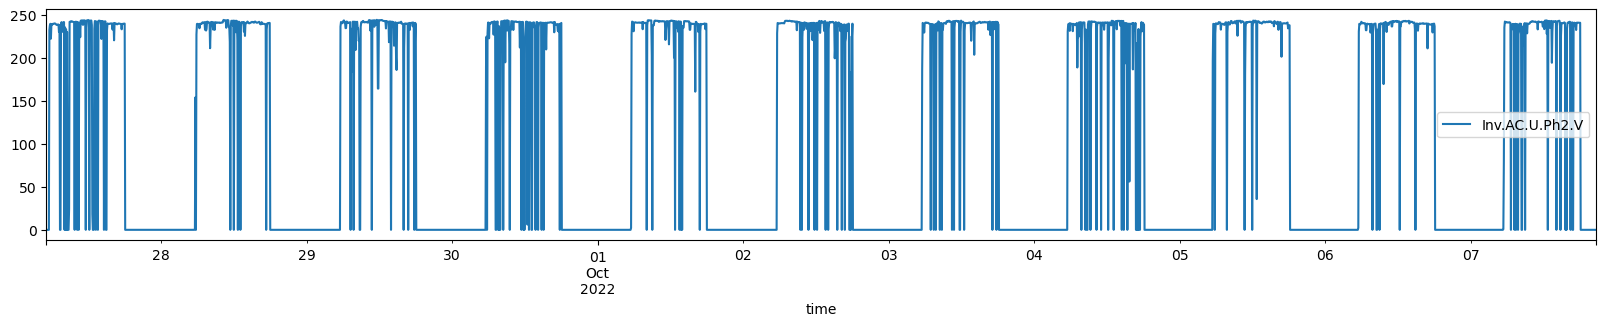

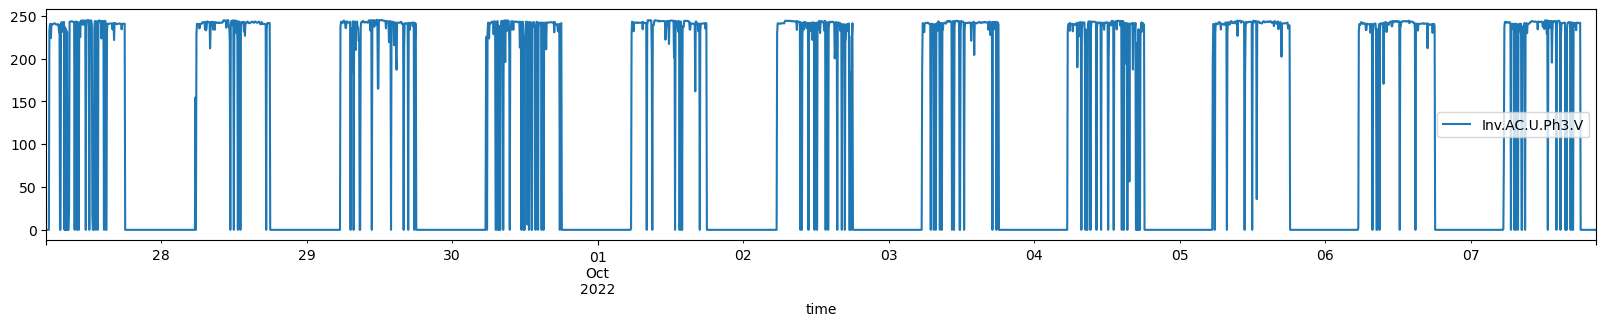

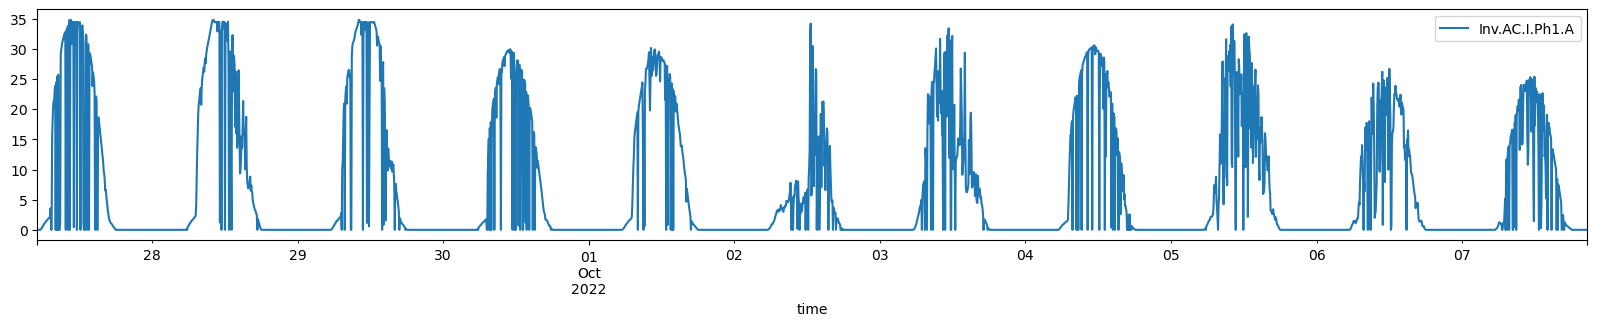

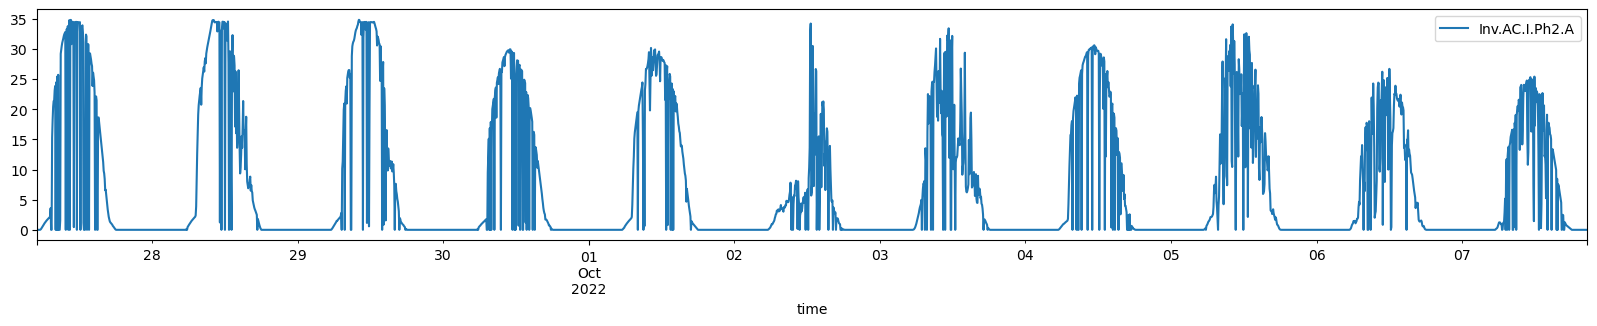

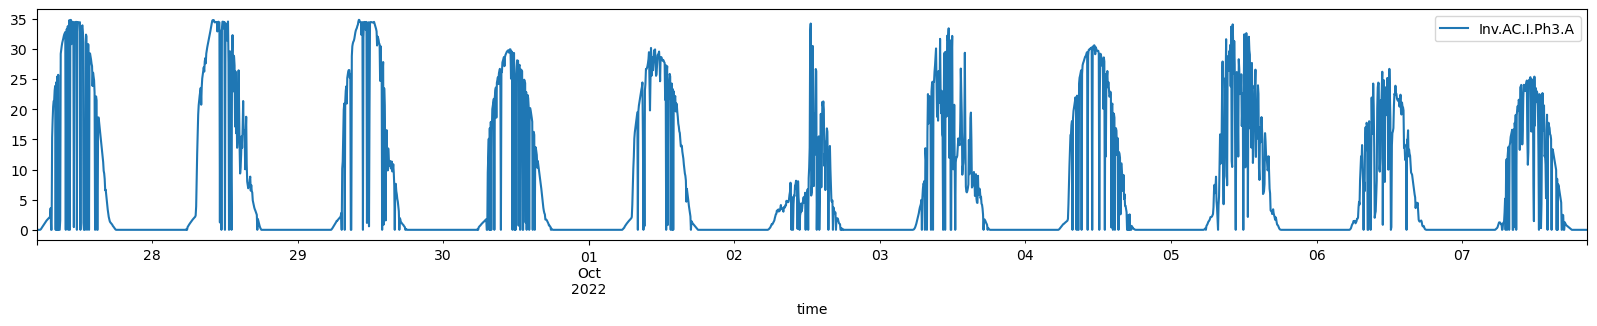

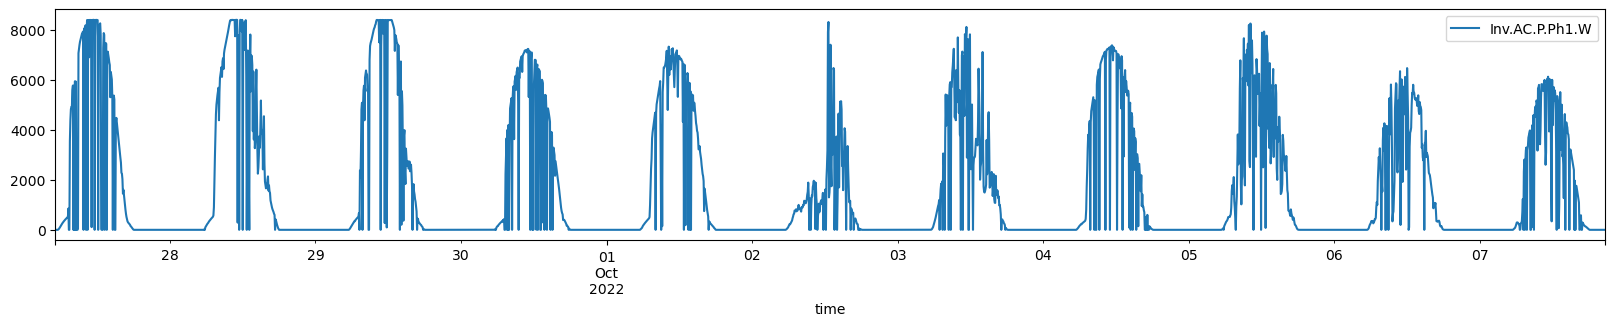

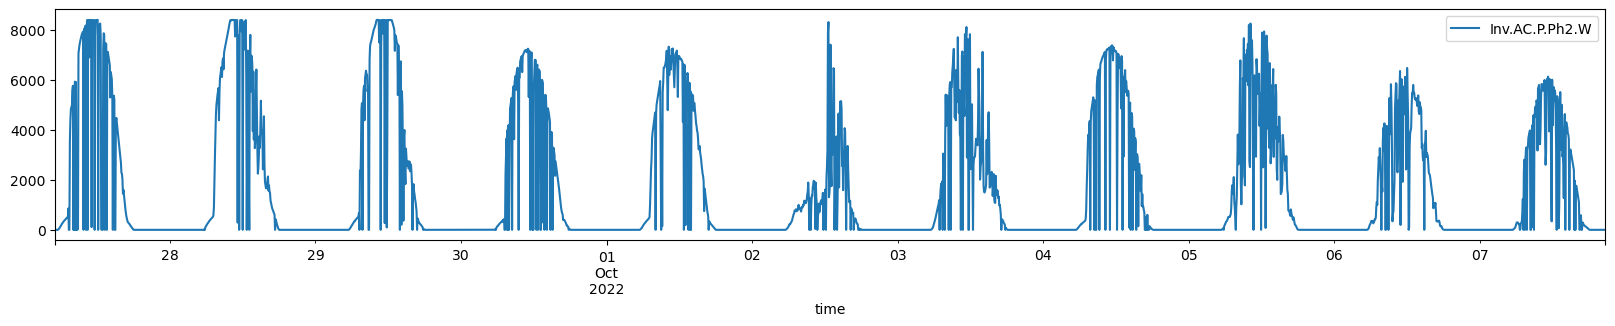

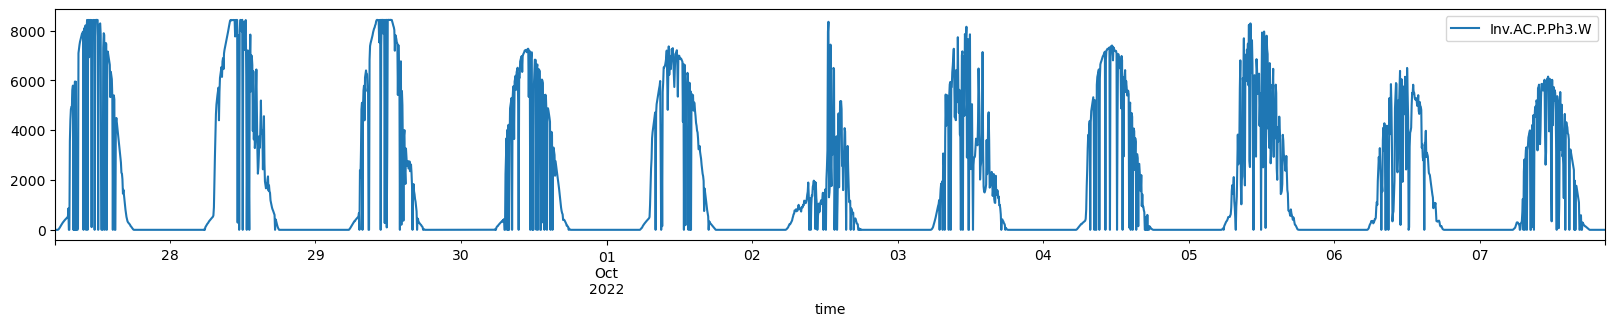

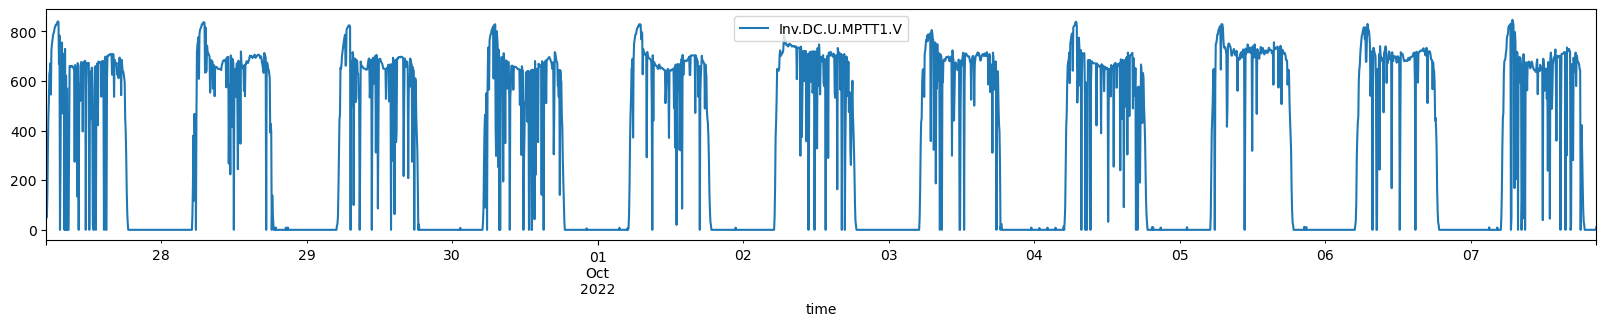

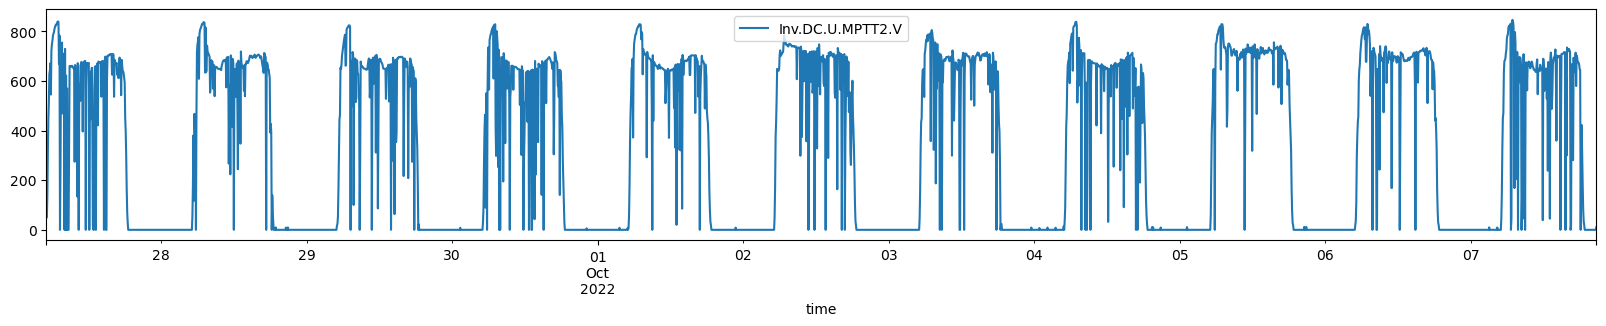

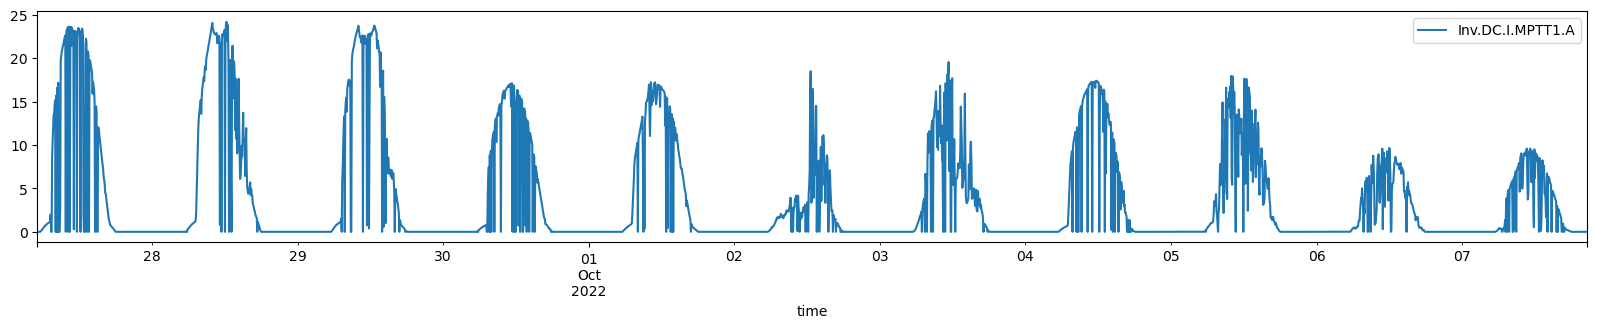

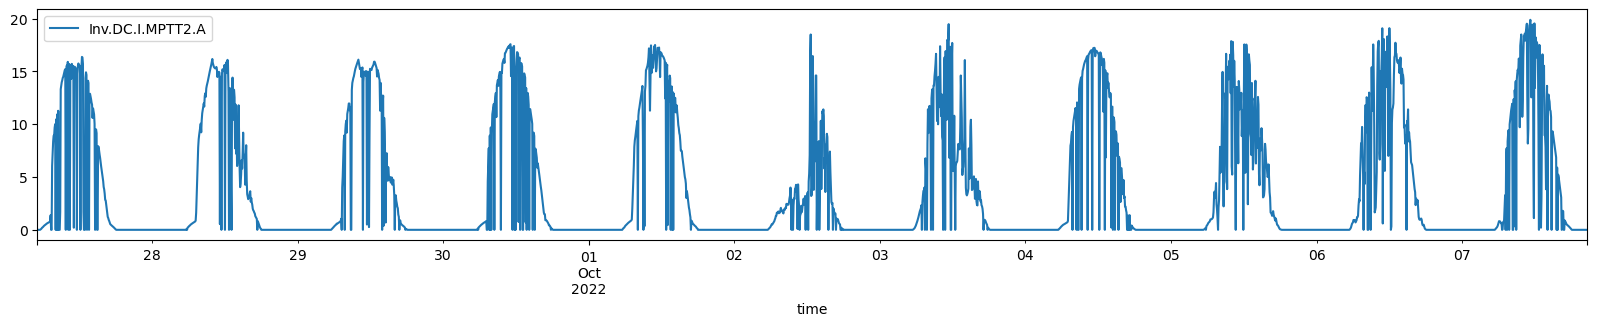

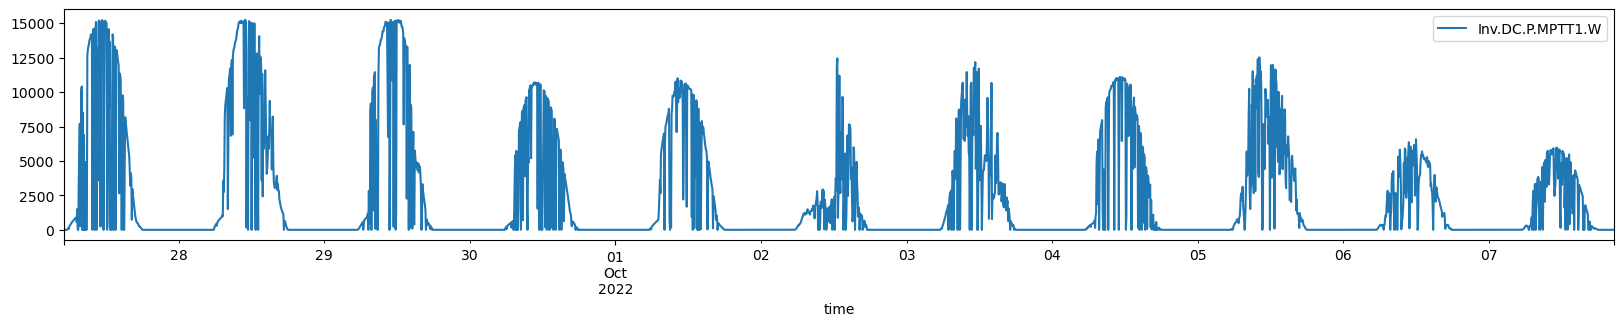

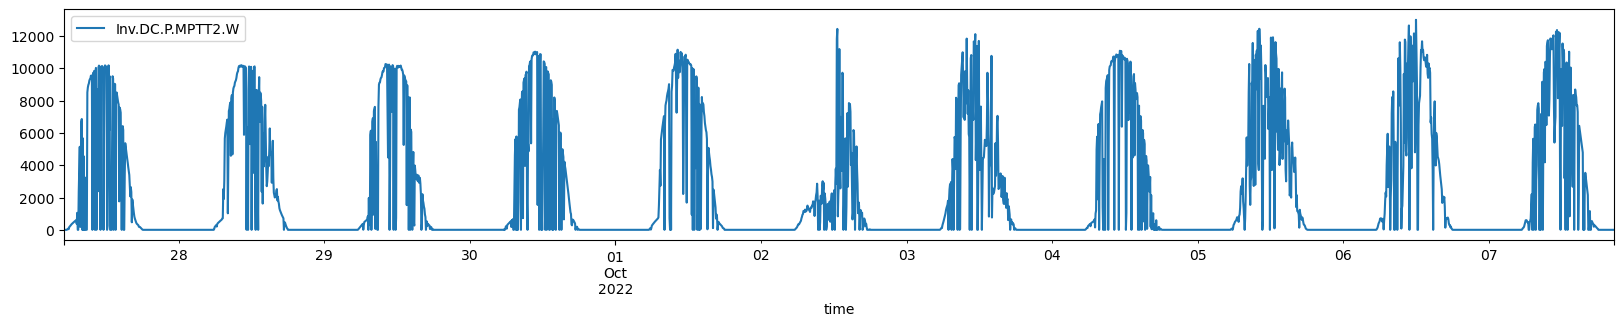

In [105]:
for icol in metrics_name_list:
    print(icol)
    if len(df_pre[icol])>0:
        df_pre[['time', icol]].set_index('time').plot(figsize=(20, 3))

# 4 Baseline calculated with theoretical model

In [106]:
from pvlib import irradiance
from pvlib import location
import pvlib

In [107]:
def get_irradiance(loc, times, tilt, surface_azimuth):
    # Generate clearsky data using the Ineichen model, which is the default
    # The get_clearsky method returns a dataframe with values for GHI, DNI,
    # and DHI
    clearsky = loc.get_clearsky(times)
    # Get solar azimuth and zenith to pass to the transposition function
    solar_position = loc.get_solarposition(times=times)
    # Use the get_total_irradiance function to transpose the GHI to POA
    POA_irradiance = irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'])
    # Return DataFrame with only GHI and POA
    return pd.DataFrame({'GHI': clearsky['ghi'],
                         'POA': POA_irradiance['poa_global']})

In [108]:
def calculate_99perentile(time_series):
    ninetyeight_percent_max = np.percentile(time_series, 99)
    filtered_data = [x for x in time_series if x >= ninetyeight_percent_max]
    # Calculate the mean value of the filtered data
    mean_99th_percentile = np.mean(filtered_data)
    return mean_99th_percentile

In [109]:
date_start = df_pre['date'].values[0]
date_end = pd.to_datetime(df_pre['date'].values[-1]) + datetime.timedelta(days=1)
date_end = date_end.strftime('%Y-%m-%d')
time_index5min_local = pd.date_range(start=pd.to_datetime(date_start).tz_localize(time_zone), end=pd.to_datetime(date_end).tz_localize(time_zone), freq='5min')

## 4.1 Find Clear-Sky day

In [110]:
# Create a function to apply to each element in the DataFrame
def set_to_true_or_nan(x):
    if pd.isna(x):
        return x
    return x > 0.8

In [111]:
##========================================================================
## clear-sky days
##========================================================================
def clearsky_cal(date_start, date_end):
    # read the clear-sky model generation for different PV sites
    df_site = pd.read_csv('../preprocessed_data/PVsite_daily_20231016.csv')

    df_site_clearsky = df_site.filter(like='EnergyYield.kWh.Daily')
    split_columns = df_site_clearsky.columns.str.split(':').str[1]
    df_site_clearsky.columns = split_columns
    df_site_clearsky.insert(0, 'date', df_site['date'].values)
    df_site_clearsky = df_site_clearsky[(df_site_clearsky['date'] >= date_start) & (df_site_clearsky['date'] <= date_end)]

    # read the expected generation of different PV sites
    df_site_expected = df_site.filter(like='Irrad.kWh.m2.Daily')
    split_columns = df_site_expected.columns.str.split(':').str[1]
    df_site_expected.columns = split_columns
    df_site_expected.insert(0, 'date', df_site['date'].values)
    df_site_expected = df_site_expected[(df_site_expected['date'] >= date_start) & (df_site_expected['date'] <= date_end)]

    # Calculate the cloudiness
    df_cloudiness = df_site_clearsky.copy()
    df_cloudiness.iloc[:, 1:] = df_site_expected.iloc[:, 1:]/df_site_clearsky.iloc[:, 1:]
    df_cloudiness.iloc[:, 1:] = df_cloudiness.iloc[:, 1:].astype(float)
    df_cloudiness.dropna(how='all', axis=1, inplace=True)
    df_cloudiness.iloc[:, 1:].fillna(axis=1, method='ffill', inplace=True)

    df_clearday_sites = df_cloudiness.copy()

    # Apply the function to the entire DataFrame
    df_clearday_sites.iloc[:, 1:] = df_clearday_sites.iloc[:, 1:].applymap(set_to_true_or_nan)
    return df_clearday_sites


In [112]:
# calculate clear-sky days based on the 
df_clearday_all = clearsky_cal(date_start=date_start, date_end=date_end)
df_clearday_all.index = np.arange(len(df_clearday_all))
df_clearday_all.set_index('date', inplace=True)
df_clearday_all.head()

,SITE|4dddc226-3464-4c95-aded-875e490a2f02,SITE|c9fcf61f-c1a9-48d8-b2bb-c843dbd69119,SITE|d317a168-4257-4187-9603-3d4834532bbb,SITE|d3f5a275-7ce6-4d52-b2f5-06035828e803,SITE|023f5228-233d-40a7-8687-6747c661eb93,SITE|83d125f1-0364-49a8-9b34-ad8053aa99e0,SITE|5a66195b-2301-46df-a9e3-79fa5432dd7c,SITE|09ad1b91-c082-45b8-bf66-444316ff0312,SITE|88ed3beb-f0f4-4114-bcb5-4e46ba56e0e1,SITE|aac7e922-2d0a-4921-9e8f-ddaca10cec2e,...,SITE|440cd8d8-a484-4c06-aac8-7c25324f473e,SITE|14353c4c-2d03-4a56-b300-33dee9009fb3,SITE|38fd6ac7-3984-41bb-933e-43a742ec7525,SITE|7eb21865-959e-4987-af63-a893e743e2b0,SITE|89926d55-19ea-4e9d-9f05-d26c61bb97a6,SITE|e4bac0c8-6cce-44ad-b5c3-5a0500be4008,SITE|1b3255ea-c7ee-41c3-bfa1-b8748787de0c,SITE|14708719-4bec-45c7-8364-e3b765109de2,SITE|4229b257-cc70-4d03-8c0a-1f0d930d792e,SITE|49965a47-7a49-4866-a11f-06cb600ac967
date,,,,,,,,,,,,,,,,,,,,,
2022-09-27,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
2022-09-28,True,True,False,False,True,False,True,False,False,False,...,True,True,False,False,False,True,False,True,False,False
2022-09-29,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
2022-09-30,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
2022-10-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [161]:
df_clearsky = df_clearday_all[site_id]
df_clearsky = df_clearsky.reset_index()
df_clearsky['date_str'] = df_clearsky['date'].astype(str)
df_clearsky = df_clearsky.rename(columns={site_id: 'clearsky day'})
df_clearsky

,date,clearsky day,date_str
0,2022-09-27,True,2022-09-27
1,2022-09-28,True,2022-09-28
2,2022-09-29,True,2022-09-29
3,2022-09-30,True,2022-09-30
4,2022-10-01,True,2022-10-01
5,2022-10-02,False,2022-10-02
6,2022-10-03,False,2022-10-03
7,2022-10-04,True,2022-10-04
8,2022-10-05,False,2022-10-05
9,2022-10-06,True,2022-10-06


## 4.2 Calculate the Theoretical Generation

In [162]:
loc = location.Location(latitude, longitude, tz=time_zone)

pvlib_irr = get_irradiance(loc, time_index5min_local, tilt, azimuth)
pvlib_irr['time']= time_index5min_local
pvlib_irr[['GHI', 'POA']] = pvlib_irr[['GHI', 'POA']]*pv_size*loss_factor/1000
# remove the day has only very limited time period
pvlib_irr = pvlib_irr.groupby(pvlib_irr['time'].dt.date).filter(lambda group: len(group) >= 100) 
pvlib_irr

,GHI,POA,time
2022-09-27 00:00:00+08:00,0.0,0.0,2022-09-27 00:00:00+08:00
2022-09-27 00:05:00+08:00,0.0,0.0,2022-09-27 00:05:00+08:00
2022-09-27 00:10:00+08:00,0.0,0.0,2022-09-27 00:10:00+08:00
2022-09-27 00:15:00+08:00,0.0,0.0,2022-09-27 00:15:00+08:00
2022-09-27 00:20:00+08:00,0.0,0.0,2022-09-27 00:20:00+08:00
...,...,...,...
2022-10-07 23:35:00+08:00,0.0,0.0,2022-10-07 23:35:00+08:00
2022-10-07 23:40:00+08:00,0.0,0.0,2022-10-07 23:40:00+08:00
2022-10-07 23:45:00+08:00,0.0,0.0,2022-10-07 23:45:00+08:00
2022-10-07 23:50:00+08:00,0.0,0.0,2022-10-07 23:50:00+08:00


<Axes: >

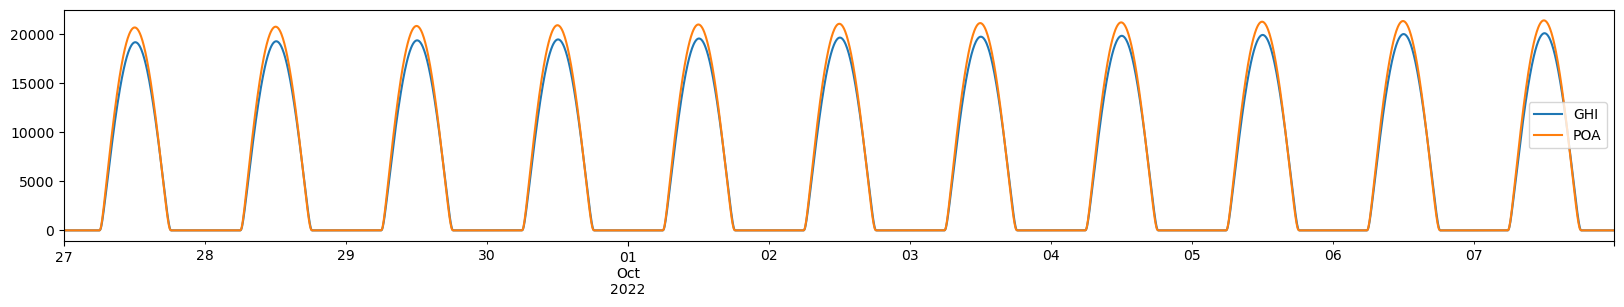

In [163]:
pvlib_irr[['GHI', 'POA']].plot(figsize=(20, 3))

In [164]:
df_pre['time'] = pd.to_datetime(df_pre['time'])
pvlib_irr['time'] = pd.to_datetime(pvlib_irr['time'])
pvlib_irr = pvlib_irr.drop_duplicates(subset='time')
# Now, you can map the values
df_pre['POA'] = df_pre['time'].map(pvlib_irr.set_index('time')['POA'])
df_pre

,time,Inv.AC.U.Ph2.V,Inv.AC.U.Ph3.V,Inv.AC.I.Ph1.A,Inv.AC.I.Ph2.A,Inv.AC.I.Ph3.A,Inv.AC.P.Ph1.W,Inv.AC.P.Ph2.W,Inv.AC.P.Ph3.W,Inv.DC.U.MPTT1.V,...,Inv.DC.I.MPTT1.A,Inv.DC.I.MPTT2.A,Inv.DC.P.MPTT1.W,Inv.DC.P.MPTT2.W,hour,date,POA,expected_shape,minute,hour_min
0,2022-09-27 05:05:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.70,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,5,5_5
1,2022-09-27 05:10:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.70,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,10,5_10
2,2022-09-27 05:15:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.40,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,15,5_15
3,2022-09-27 05:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,316.30,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,20,5_20
4,2022-09-27 05:25:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.71,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,25,5_25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,2022-10-07 20:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,20,2022-10-07,0.0,0.0,20,20_20
3064,2022-10-07 20:25:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,20,2022-10-07,0.0,0.0,25,20_25
3065,2022-10-07 20:30:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,20,2022-10-07,0.0,0.0,30,20_30
3066,2022-10-07 20:35:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,20,2022-10-07,0.0,0.0,35,20_35


<Axes: xlabel='time'>

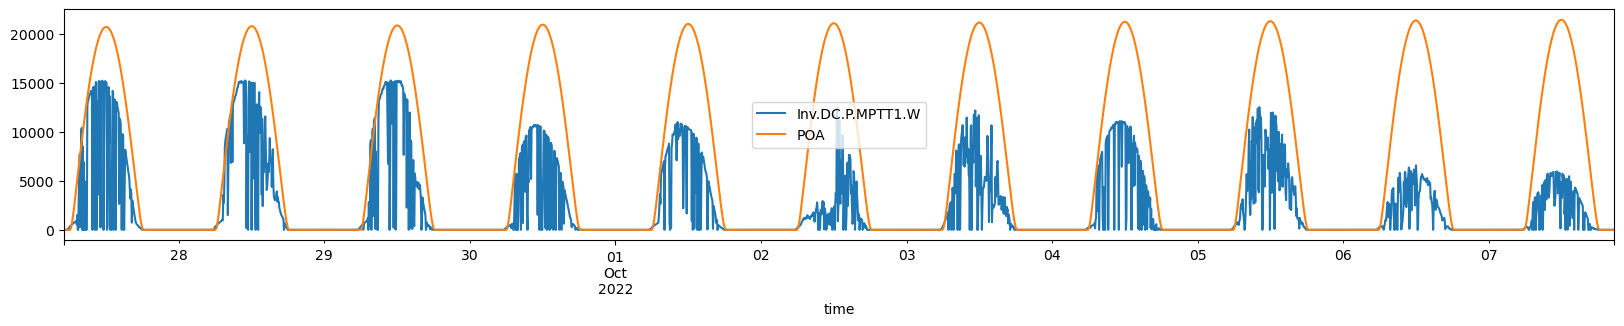

In [165]:
df_pre[['time', concern_mppt, 'POA']].set_index('time').plot(figsize=(20, 3))

## 4.3 Find Baseline: the day that maximum value larger than 99 percntile value will be regarded as the baseline

In [166]:
metric_mppt_list = df_pre.filter(like='.P.MPTT').columns.to_list()
metric_mppt_list

['Inv.DC.P.MPTT1.W', 'Inv.DC.P.MPTT2.W']

In [168]:
clearsky_days_list = df_clearsky.loc[df_clearsky['clearsky day']==True, 'date_str'].values
clearsky_days_list

array(['2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
       '2022-10-01', '2022-10-04', '2022-10-06', '2022-10-07',
       '2022-10-08'], dtype=object)

In [169]:
# Group by date and calculate the 99th percentile for each day
percentile_99_values = df_pre.groupby(df_pre['date'])[concern_mppt].quantile(0.99).reset_index()
date_maxmppt1 = percentile_99_values.loc[percentile_99_values[concern_mppt].idxmax()]['date']
print(date_maxmppt1)
percentile_99_values

2022-09-29


,date,Inv.DC.P.MPTT1.W
0,2022-09-27,15190.9080
1,2022-09-28,15158.4300
2,2022-09-29,15210.2316
3,2022-09-30,10670.3940
4,2022-10-01,10762.3884
5,2022-10-02,9855.0336
6,2022-10-03,11657.9568
7,2022-10-04,11047.4604
8,2022-10-05,11955.9732
9,2022-10-06,6061.6248


In [170]:
def calculate_99perentile(time_series):
    ninetyeight_percent_max = np.percentile(time_series, 99)
    filtered_data = [x for x in time_series if x >= ninetyeight_percent_max]
    # Calculate the mean value of the filtered data
    mean_99th_percentile = np.mean(filtered_data)
    return mean_99th_percentile

In [171]:
## rescale the theoretical power to the actual one
df_pre['expected_shape'] = df_pre['POA'].values
for date_id in df_pre['date'].unique():
    # ================ Scale ==========Find maximum values
    max_value1 = calculate_99perentile(time_series=df_pre.loc[df_pre['date']==date_id, 'POA'].values)
    max_value2 = calculate_99perentile(time_series=df_pre.loc[df_pre['date']==date_id, concern_mppt].values)
    df_pre.loc[df_pre['date']==date_id, 'expected_shape'] = df_pre.loc[df_pre['date']==date_id, 'POA'].values*(max_value2 / max_value1)
df_pre

,time,Inv.AC.U.Ph2.V,Inv.AC.U.Ph3.V,Inv.AC.I.Ph1.A,Inv.AC.I.Ph2.A,Inv.AC.I.Ph3.A,Inv.AC.P.Ph1.W,Inv.AC.P.Ph2.W,Inv.AC.P.Ph3.W,Inv.DC.U.MPTT1.V,...,Inv.DC.I.MPTT1.A,Inv.DC.I.MPTT2.A,Inv.DC.P.MPTT1.W,Inv.DC.P.MPTT2.W,hour,date,POA,expected_shape,minute,hour_min
0,2022-09-27 05:05:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.70,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,5,5_5
1,2022-09-27 05:10:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.70,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,10,5_10
2,2022-09-27 05:15:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.40,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,15,5_15
3,2022-09-27 05:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,316.30,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,20,5_20
4,2022-09-27 05:25:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.71,...,0.0,0.0,0.0,0.0,5,2022-09-27,0.0,0.0,25,5_25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,2022-10-07 20:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,20,2022-10-07,0.0,0.0,20,20_20
3064,2022-10-07 20:25:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,20,2022-10-07,0.0,0.0,25,20_25
3065,2022-10-07 20:30:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,20,2022-10-07,0.0,0.0,30,20_30
3066,2022-10-07 20:35:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,20,2022-10-07,0.0,0.0,35,20_35


<Axes: xlabel='time'>

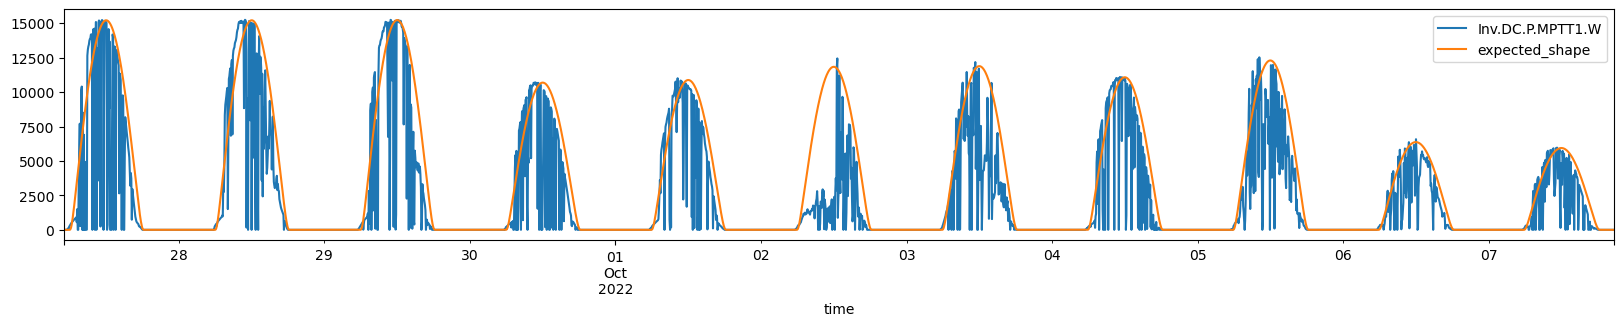

In [172]:
df_pre[['time', concern_mppt, 'expected_shape']].set_index('time').plot(figsize=(20, 3))

In [173]:
df_pre['minute'] = df_pre['time'].dt.minute
df_pre['hour_min'] = df_pre['hour'].astype(str) + '_' + df_pre['minute'].astype(str)
df_baseline = df_pre[df_pre['date']==date_maxmppt1].copy()
df_baseline.index = np.arange(len(df_baseline))
df_baseline.head()

,time,Inv.AC.U.Ph2.V,Inv.AC.U.Ph3.V,Inv.AC.I.Ph1.A,Inv.AC.I.Ph2.A,Inv.AC.I.Ph3.A,Inv.AC.P.Ph1.W,Inv.AC.P.Ph2.W,Inv.AC.P.Ph3.W,Inv.DC.U.MPTT1.V,...,Inv.DC.I.MPTT1.A,Inv.DC.I.MPTT2.A,Inv.DC.P.MPTT1.W,Inv.DC.P.MPTT2.W,hour,date,POA,expected_shape,minute,hour_min
0,2022-09-29 00:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2022-09-29,0.0,0.0,0,0_0
1,2022-09-29 00:05:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2022-09-29,0.0,0.0,5,0_5
2,2022-09-29 00:10:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2022-09-29,0.0,0.0,10,0_10
3,2022-09-29 00:15:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2022-09-29,0.0,0.0,15,0_15
4,2022-09-29 00:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2022-09-29,0.0,0.0,20,0_20


# 5 Detect daily String Fault

In [174]:
threshold_time = 1  # 1%
threshold_reduction = 10 # 10%
threshold_constant = 3 # the vairable threshold value for the reduction percentage of same string number issue
threshold_days = 2
hour_start, hour_end = 9, 16 # 9 am - 4 pm
threshold_points_daily = int((hour_end-hour_start)*12//2) # for 5-minute data
print(threshold_points_daily)

df_sfresults = df_clearsky[['date', 'clearsky day', 'date_str']].copy()
df_sfresults[['points_same', 'reduction(%)', '1stcheck_potential_string_fault']] = np.nan

42


In [176]:
df_sfresults_clearsky = df_clearsky.loc[df_clearsky['clearsky day']==True, ['date', 'clearsky day',	'date_str']].copy()

df_pre['clearsky'] = df_pre['date'].map(df_clearsky.set_index('date')['clearsky day'])
df_pre = df_pre[df_pre['clearsky']==True]

In [177]:
# ==== 1. Set the 'baseline' column in df_pre to NaN
df_pre['baseline'] = np.nan
# Create a dictionary mapping 'hour_min' to 'expected_shape' from df_baseline
hour_min_to_shape = df_baseline.set_index('hour_min')['expected_shape'].to_dict()
# Use the map function to populate the 'baseline' column
df_pre['baseline'] = df_pre['hour_min'].map(hour_min_to_shape)

# calculate difference
df_pre['diff_baseline'] = (df_pre['baseline']-df_pre['expected_shape'])/max(df_baseline[concern_mppt].values)*100
df_pre['diff_over_time'] = df_pre['diff_baseline'].diff().abs()
df_pre['diff_over_time'].fillna(0, inplace=True)

# the reductions are same
df_pre['reduction_same'] = df_pre['diff_over_time']<threshold_time

# check the same reduction points in each day
for date_id in df_pre['date'].unique():
    # print('='*30)
    # print(date_id)
    points_num = len(df_pre[(df_pre['date']==date_id) & (df_pre['hour']>=hour_start) & (df_pre['hour']<=hour_end) &(df_pre['reduction_same']==True)])
    reduction_percentage = df_pre.loc[(df_pre['date']==date_id) & (df_pre['hour']>=hour_start) & (df_pre['hour']<=hour_end) &(df_pre['reduction_same']==True), 'diff_baseline'].median()
    clearsky_day = df_sfresults.loc[df_sfresults['date']==date_id, 'clearsky day'].values[0]

    firstcheck_potential_string_fault = (points_num>threshold_points_daily)& (reduction_percentage>threshold_reduction )& (clearsky_day)
    df_sfresults_clearsky.loc[df_sfresults_clearsky['date_str']==date_id, ['points_same', 'reduction(%)', '1stcheck_potential_string_fault']] = [points_num, reduction_percentage, firstcheck_potential_string_fault ]
    # print(points_num, reduction_percentage, points_num>threshold_points_daily)
 
df_sfresults_clearsky


,date,clearsky day,date_str,points_same,reduction(%),1stcheck_potential_string_fault
0,2022-09-27,True,2022-09-27,96.0,0.139990,False
1,2022-09-28,True,2022-09-28,96.0,0.105470,False
2,2022-09-29,True,2022-09-29,96.0,0.000000,False
3,2022-09-30,True,2022-09-30,96.0,25.370980,True
4,2022-10-01,True,2022-10-01,96.0,24.276827,True
7,2022-10-04,True,2022-10-04,96.0,23.063251,True
9,2022-10-06,True,2022-10-06,72.0,53.179532,True
10,2022-10-07,True,2022-10-07,68.0,56.310049,True
11,2022-10-08,True,2022-10-08,NaN,NaN,NaN


In [178]:
## ==========================================================##
## == find consecutive fault
## == dnum is the setted string number with string type
## ==========================================================##
def consecutive_compare(df, threshold_time):
    df['period'] = df['2ndcheck_potential_string_fault'].diff().ne(0).cumsum()
    df['duration'] = df.groupby('period')['2ndcheck_potential_string_fault'].transform('sum')
    df['string_fault'] = (df['2ndcheck_potential_string_fault']>0) & (df['duration']>=threshold_time)
    df.drop(['period', 'duration'], axis=1, inplace=True)
    return df

In [179]:
# daily consectutive check
df_sfresults_clearsky['diff_over_daily'] = df_sfresults_clearsky['reduction(%)'].diff()
df_sfresults_clearsky['diff_daily_same'] = df_sfresults_clearsky['diff_over_daily'].abs()<threshold_constant
df_sfresults_clearsky['2ndcheck_potential_string_fault'] = df_sfresults_clearsky['diff_daily_same'] & df_sfresults_clearsky['1stcheck_potential_string_fault']
df_sfresults_clearsky = consecutive_compare(df=df_sfresults_clearsky, threshold_time=threshold_days)
df_sfresults_clearsky

,date,clearsky day,date_str,points_same,reduction(%),1stcheck_potential_string_fault,diff_over_daily,diff_daily_same,2ndcheck_potential_string_fault,string_fault
0,2022-09-27,True,2022-09-27,96.0,0.139990,False,NaN,False,False,False
1,2022-09-28,True,2022-09-28,96.0,0.105470,False,-0.034520,True,False,False
2,2022-09-29,True,2022-09-29,96.0,0.000000,False,-0.105470,True,False,False
3,2022-09-30,True,2022-09-30,96.0,25.370980,True,25.370980,False,False,False
4,2022-10-01,True,2022-10-01,96.0,24.276827,True,-1.094153,True,True,True
7,2022-10-04,True,2022-10-04,96.0,23.063251,True,-1.213576,True,True,True
9,2022-10-06,True,2022-10-06,72.0,53.179532,True,30.116281,False,False,False
10,2022-10-07,True,2022-10-07,68.0,56.310049,True,3.130517,False,False,False
11,2022-10-08,True,2022-10-08,NaN,NaN,NaN,NaN,False,False,False


In [180]:
df_sfresults_clearsky[df_sfresults_clearsky['string_fault']==True]

,date,clearsky day,date_str,points_same,reduction(%),1stcheck_potential_string_fault,diff_over_daily,diff_daily_same,2ndcheck_potential_string_fault,string_fault
4,2022-10-01,True,2022-10-01,96.0,24.276827,True,-1.094153,True,True,True
7,2022-10-04,True,2022-10-04,96.0,23.063251,True,-1.213576,True,True,True
